# Import Library

In [ ]:
# Import TensorFlow library untuk machine learning
import tensorflow as tf
# Import NumPy library untuk manipulasi array dan perhitungan numerik
import numpy as np
# Import Pandas library untuk manipulasi dan analisis data tabular
import pandas as pd
# Import Matplotlib dan Seaborn untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
# Import LabelBinarizer untuk mengkonversi label kategori menjadi bentuk biner
from sklearn.preprocessing import LabelBinarizer
# Import train_test_split untuk membagi data menjadi data pelatihan dan pengujian
from sklearn.model_selection import train_test_split
# Import classification_report untuk mengevaluasi kinerja model klasifikasi
from sklearn.metrics import classification_report
# Import zipfile untuk bekerja dengan file zip
import zipfile

# Load Dataset

## Load MNIST

In [ ]:
# Import dataset mnist dari pustaka keras.datasets di TensorFlow
# Dataset MNIST merupakan dataset gambar digit tulisan tangan (0-9) yang umum digunakan untuk tugas-tugas pengenalan digit.
from tensorflow.keras.datasets import mnist

In [ ]:
# Memuat data pelatihan dan label pelatihan, serta data uji dan label uji dari dataset mnist
# Fungsi load_data() secara otomatis membagi dataset menjadi data pelatihan dan uji
# train_data dan train_labels berisi data pelatihan dan label pelatihan, sedangkan test_data dan test_labels berisi data uji dan label uji
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Memeriksa bentuk (shape) data pelatihan dan data uji
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

Penjelasan Output :
- Data pelatihan memiliki 60,000 sampel, setiap sampel berbentuk gambar 28x28 piksel.
- Data uji memiliki 10,000 sampel, juga dengan gambar 28x28 piksel.

In [ ]:
# Memeriksa bentuk (shape) label pelatihan dan label uji
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

Penjelasan Output :
- Label pelatihan dan uji masing-masing memiliki 60,000 dan 10,000 elemen.
- Label adalah bilangan bulat yang mewakili digit yang sesuai dengan gambar tulisan tangan.

In [ ]:
# Memeriksa bentuk (shape) dari satu sampel data pelatihan, dimana seharusnya dimensi gambar adalah 28x28
train_data[0].shape

(28, 28)

Penjelasan Output :
- Output diatas menunjukkan bahwa 1 sampel data pelatihan pertama adalah gambar berukuran 28x28 piksel.

In [ ]:
# Memeriksa bentuk (shape) dari label pelatihan yang seharusnya hanya satu dimensi karena ini adalah masalah klasifikasi biner
train_labels.shape

(60000,)

Penjelasan Output :
- Output diatas menunjukkan bahwa label pelatihan terdiri dari 60,000 elemen, masing-masing merepresentasikan digit yang sesuai dengan gambar tulisan tangan.

### Combine Train and Test Data

In [ ]:
# menggabungkan data pelatihan dan data uji dalam satu array vertikal.
digits_data = np.vstack([train_data, test_data])
# menggabungkan label pelatihan dan label uji dalam satu array horizontal.
digits_labels = np.hstack([train_labels, test_labels])

In [ ]:
# Memeriksa bentuk (shape) gabungan data
digits_data.shape

(70000, 28, 28)

Penjelasan Output:
- Data gabungan memiliki 70,000 sampel dengan dimensi gambar 28x28 piksel.

In [ ]:
# Memeriksa bentuk (shape) gabungan label
digits_labels.shape

(70000,)

Penjelasan Output:
- Label gabungan memiliki 70,000 elemen, masing-masing merepresentasikan digit yang sesuai dengan gambar tulisan tangan.

Text(0.5, 1.0, 'Class: 7')

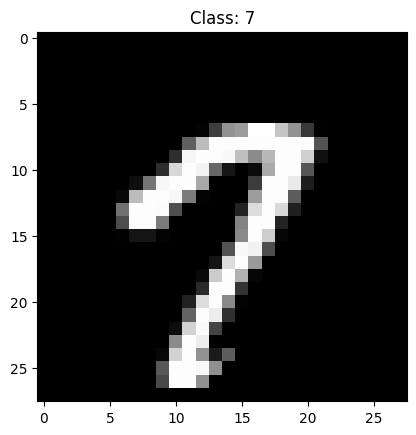

In [ ]:
# Memeriksa secara acak satu sampel dari data gabungan
idx = np.random.randint(0, digits_data.shape[0])
# Menampilkan secara acak satu sampel data
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

Penjelasan Output:
- Program akan memilih secara acak satu sampel dari data gabungan dan menampilkannya menggunakan Matplotlib. Judul plot menunjukkan kelas atau label yang sesuai dengan gambar tersebut. Dalam kode ini, labelnya adalah 7.

<Axes: xlabel='Labels', ylabel='count'>

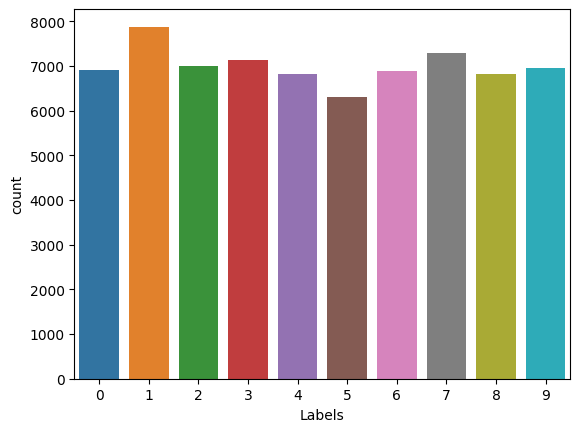

In [ ]:
# Memeriksa distribusi data
# Membuat DataFrame Pandas dari label gabungan
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
# Menggunakan Seaborn untuk membuat countplot dari distribusi label
sns.countplot(df_labels, x='Labels')

Penjelasan output:
- Output yang dihasilkan adalah diagram batang yang menunjukkan sebaran jumlah setiap kelas atau digit dalam dataset. Masing-masing batang merepresentasikan jumlah kemunculan setiap digit.

- Pada sumbu x, memiliki label atau digit (0-9), dan pada sumbu y, memiliki jumlah kemunculan setiap digit dalam dataset.

- Plot ini membantu dalam memahami sebaran kelas dan memastikan bahwa dataset tidak memiliki ketidakseimbangan yang signifikan dalam jumlah sampel untuk setiap digit.
- Dalam kasus ini, setiap digit memiliki jumlah sampel yang relatif seimbang, yang merupakan kondisi yang baik untuk melatih model klasifikasi.

## Load Kaggle A-Z

In [ ]:
# Mengunduh file zip dari URL
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-11-30 08:42:08--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  70.0MB/s    in 2.6s    

2023-11-30 08:42:11 (70.0 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [ ]:
# Mengekstrak file zip
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r') # Membuat objek ZipFile dengan mode "r" (read) untuk membaca file zip.
zip_object.extractall('./') # Mengekstrak semua isi file zip ke direktori saat ini ('./').
zip_object.close() # Menutup objek ZipFile setelah ekstraksi selesai.

In [ ]:
# Menghubungkan Google Drive (pada lingkungan Colab)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Membaca dataset A-Z Handwritten Data dari file CSV
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
# Menampilkan dataset
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Penjelasan output:
- Output yang ditampilkan adalah dataset A-Z Handwriting Data.csv. Data frame ini digunakan untuk melatih dan mengevaluasi model OCR CNN
- Dataset ini memiliki 372,450 baris dan 785 kolom, di mana kolom pertama adalah label dan kolom-kolom berikutnya (784 kolom) adalah nilai piksel dari gambar-gambar alfabet tulisan tangan yang terdiri dari A-Z.

In [ ]:
# Mengambil hanya data piksel (pixel data)
alphabet_data = dataset_az.drop('0', axis=1)
# Mengambil hanya label
alphabet_labels = dataset_az['0']

In [ ]:
# Memeriksa bentuk (shape) data piksel
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

Penjelasan output : Data piksel memiliki bentuk (372450, 784), sementara label memiliki bentuk (372450,).

In [ ]:
# Memeriksa bentuk (shape) label
alphabet_labels.shape

(372450,)

Penjelasan output: Data label memiliki bentuk (372450,).

In [ ]:
# Mereshape data piksel menjadi ukuran 28x28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Memeriksa hasilnya berdasarkan bentuknya
alphabet_data.shape

(372450, 28, 28)

Awalnya data di reshape menjadi ukuran 28x28 sehingga memunculkan output diatas yang merupakan hasil dari reshaping. Sekarang data piksel memiliki bentuk (372450, 28, 28), yang sesuai dengan dimensi gambar tulisan tangan alfabet A-Z.

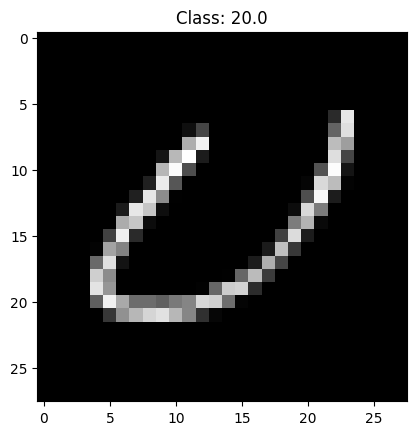

In [ ]:
# Memilih secara acak indeks dari dataset A-Z.
index = np.random.randint(0, alphabet_data.shape[0])
# Menampilkan gambar yang dipilih secara acak dari dataset A-Z menggunakan Matplotlib.
plt.imshow(alphabet_data[index], cmap = 'gray')
# Menampilkan judul plot yang mencakup label kelas dari gambar yang ditampilkan.
plt.title('Class: ' + str(alphabet_labels[index]));

Penjelasan output:
- Output dari kode Python tersebut adalah gambar huruf "u" yang berukuran 28x28 piksel. Gambar tersebut merupakan representasi dari data label 20 dari dataset A-Z Handwritten Data.csv.

<Axes: xlabel='Labels', ylabel='count'>

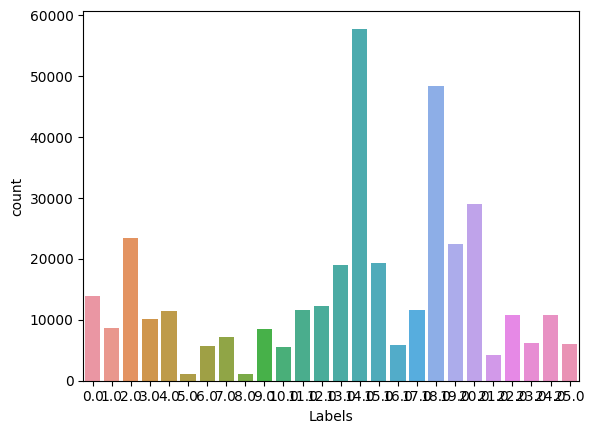

In [ ]:
# Mengecek distribusi label pada dataset A-Z
# Membuat DataFrame Pandas untuk label dari dataset A-Z.
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
# Membuat plot batang menggunakan Seaborn untuk menampilkan distribusi label pada dataset A-Z
sns.countplot(df_az_labels, x='Labels')

Output yang dihasilkan adalah diagram batang yang menunjukkan sebaran jumlah setiap kelas atau karakter dalam dataset A-Z. Masing-masing batang merepresentasikan jumlah kemunculan setiap karakter.

Pada sumbu x memiliki label atau karakter (0-25, karena terdapat 26 karakter A-Z), dan pada sumbu y memiliki jumlah kemunculan setiap karakter dalam dataset.

Plot ini membantu dalam memahami sebaran karakter dan memastikan bahwa dataset A-Z tidak memiliki ketidakseimbangan yang signifikan dalam jumlah sampel untuk setiap karakter. Dalam konteks pengenalan karakter, distribusi yang seimbang dapat membantu model mempelajari dengan baik setiap karakter.

## Combine Dataset (MNIST + Kaggel A-Z)

In [ ]:
# Memeriksa nilai unik dari labels untuk dataset digit
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Output yang dihasilkan berupa array dengan nilai unik dari label digit, yaitu 0, 1, 2, 3, 4, 5, 6, 7, 8, dan 9. Dtype (dtype=uint8) menunjukkan bahwa tipe data label ini adalah unsigned integer dengan 8 bit.

In [ ]:
# Memeriksa nilai unik dari labels untuk dataset alfabet
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

Output yang dihasilkan berupa array dengan nilai unik dari label alfabet, yaitu 0.0, 1.0, 2.0, ..., 25.0. Dtype (dtype=float32) menunjukkan bahwa tipe data label ini adalah float32. Setelah penambahan (alphabet_labels += 10), nilai uniknya menjadi 10.0, 11.0, 12.0, ..., 35.0.

In [ ]:
# Kita tahu bahwa label untuk dataset digit berkisar dari 0-9 (10 label)
# Kita juga tahu bahwa label untuk dataset alfabet dimulai dari 0-25 yang merepresentasikan A-Z
# Jika kita ingin menggabungkannya, label A-Z seharusnya melanjutkan label dari dataset digit

alphabet_labels += 10

In [ ]:
# Memeriksa kembali label alfabet
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

Setelah penambahan (alphabet_labels += 10), nilai unik dari label pada dataset alfabet menjadi array [10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.]. Dtype (dtype=float32) menunjukkan bahwa tipe data label ini adalah float32.

In [ ]:
# Menggabungkan kedua dataset (digit dan alfabet)
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
# Memeriksa bentuk (shape) hasil penggabungan
data.shape, labels.shape

((442450, 28, 28), (442450,))

- Output (442450, 28, 28) menunjukkan bahwa data sekarang memiliki 442,450 sampel, masing-masing dengan dimensi gambar 28x28 piksel.
-  Output (442450,) menunjukkan bahwa terdapat 442,450 label yang sesuai dengan setiap sampel data. Jumlah label sama dengan jumlah sampel data, menunjukkan bahwa setiap sampel memiliki label yang sesuai.

In [ ]:
# Memeriksa nilai unik dari label gabungan
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

Output yang dihasilkan adalah array bertipe data float32

In [ ]:
# Mengonversi data ke float32
data = np.array(data, dtype = 'float32')

In [ ]:
# Karena Convolutional Neural Network (CNN) memerlukan data 3D (termasuk kedalaman/depth),
# dan gambar-gambar kita hanya dalam format 2D (karena dalam format grayscale),
# kita perlu menambahkan "kedalaman" ke dalam data
data = np.expand_dims(data, axis=-1)

# Memeriksa bentuk (shape) hasil akhir data
data.shape

(442450, 28, 28, 1)

Output (442450, 28, 28, 1) menunjukkan bahwa data sekarang memiliki 442,450 sampel, masing-masing dengan dimensi gambar 28x28 piksel, dan satu saluran warna (karena ada dimensi kedalaman/depth sebesar 1). Data ini sudah siap untuk digunakan dalam pelatihan model Convolutional Neural Network (CNN).

# Preprocessing

In [ ]:
# Normalisasi data
data /= 255.0

In [ ]:
# Memeriksa rentang nilai data
data[0].min(), data[0].max()

(0.0, 1.0)

In [ ]:
# Encode label
# LabelBinarizer mirip dengan OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

**Penjelasan**: Menggunakan LabelBinarizer untuk mengkodekan label menjadi bentuk biner (one-hot encoding). Hasilnya adalah array dengan bentuk (442450, 36) karena sekarang terdapat 36 label yang mewakili digit 0-9 dan huruf A-Z.

In [ ]:
# Memeriksa bentuk label setelah encoding
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

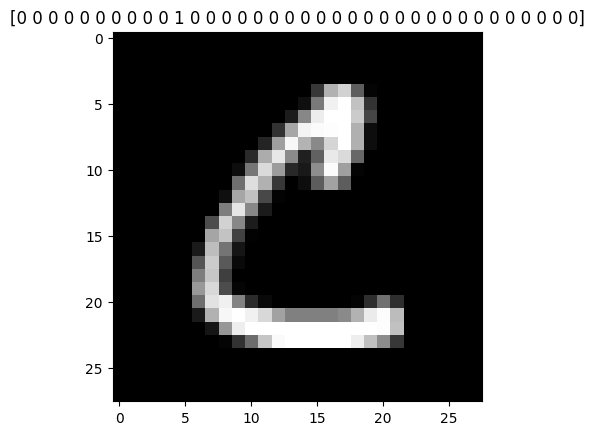

In [ ]:
# Memeriksa data dengan label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

Kode diatas akan menampilkan label biner yang sesuai dengan sampel tersebut. Outputnya adalah Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]'). Label ini menunjukkan bahwa digit atau huruf yang mewakili sampel tersebut adalah 10, yang sesuai dengan huruf 'A' dalam alfabet.

In [ ]:
# Karena datanya tidak seimbang, maka diberikan bobot untuk data 'small'
# Memeriksa jumlah data untuk setiap label terlebih dahulu
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

Menghitung total data untuk setiap label menggunakan fungsi sum pada axis 0, menghasilkan array yang berisi jumlah data untuk setiap label.

In [ ]:
# Memeriksa nilai tertinggi dari jumlah data
classes_total.max()

57825

Dari kode diatas, didapatkan nilai tertinggi dari jumlah data yaitu 57825

In [ ]:
# Membuat bobot untuk setiap data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Memeriksa bobot untuk setiap data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

**Penjelasan:**
Membuat dictionary **classes_weights** yang berisi bobot untuk setiap label. Bobot dihitung sebagai hasil pembagian nilai tertinggi jumlah data dengan jumlah data untuk setiap label. classes_weights menunjukkan bobot untuk setiap label setelah dihitung. Bobot ini akan digunakan dalam pelatihan model untuk menangani ketidakseimbangan data.

# Split Data to Train and Test

In [ ]:
# Memisahkan data menjadi data latih dan data uji dengan menggunakan train_test_split
# Stratifikasi dilakukan agar distribusi label pada data latih dan data uji tetap seimbang
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [ ]:
# Import library ImageDataGenerator dari Keras untuk augmentasi data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Membuat objek ImageDataGenerator untuk augmentasi data
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [ ]:
# Import library
from tensorflow.keras.models import Sequential # Model sequential digunakan untuk menumpuk layer secara berurutan.
# Conv2D: Layer konvolusi untuk mengekstraksi fitur dari input.
# MaxPool2D: Layer pooling untuk mereduksi dimensi spasial.
# Flatten: Layer untuk meratakan output menjadi satu dimensi.
# Dense: Layer fully connected (dense layer) untuk menghubungkan semua neuron dalam satu layer dengan semua neuron dalam layer berikutnya.
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint # untuk menyimpan model selama pelatihan.

In [ ]:
# Membangun model Convolutional Neural Network (CNN)
network = Sequential()
# Menambahkan layer Convolutional pertama dengan 32 filter, kernel size 3x3, fungsi aktivasi ReLU, dan input shape 28x28x1
network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
# Menambahkan layer MaxPooling untuk mereduksi dimensi spasial
network.add(MaxPool2D(pool_size=(2,2)))
# Menambahkan layer Convolutional kedua dengan 64 filter, kernel size 3x3, fungsi aktivasi ReLU, dan padding sama
network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
# Menambahkan layer MaxPooling
network.add(MaxPool2D(pool_size=(2,2)))
# Menambahkan layer Convolutional ketiga dengan 128 filter, kernel size 3x3, fungsi aktivasi ReLU, dan padding valid
network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
# Menambahkan layer MaxPooling
network.add(MaxPool2D(pool_size=(2,2)))
# Meratakan output menjadi satu dimensi
network.add(Flatten())
# Menambahkan layer Dense pertama dengan 64 neuron dan fungsi aktivasi ReLU
network.add(Dense(64, activation = 'relu'))
# Menambahkan layer Dense kedua dengan 128 neuron dan fungsi aktivasi ReLU
network.add(Dense(128, activation = 'relu'))
#Menambahkan layer Dense terakhir dengan 36 neuron (sesuai jumlah kelas) dan fungsi aktivasi softmax
network.add(Dense(36, activation='softmax'))
# Mengompilasi model dengan fungsi loss categorical_crossentropy, optimizer Adam, dan metrik akurasi
network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Menampilkan ringkasan (summary) dari model
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

Penjelasan:
- Model yang digunakan adalah sequential.
- Setiap layer dalam model diberi label "Layer (type)" dan informasi output shape dari layer tersebut. Misalnya, layer pertama adalah Conv2D dengan output shape (None, 26, 26, 32), yang artinya outputnya memiliki dimensi 26x26 dengan 32 channel (filter).Layer MaxPooling2D kemudian mengurangi dimensi spasial menjadi setengahnya untuk setiap dimensi (output shape: (None, 13, 13, 32)).
- Param # menunjukkan jumlah parameter yang dapat di-train oleh model pada setiap layer. Misalnya, Conv2D pertama memiliki 320 parameter yang dapat diatur selama proses pelatihan.
- Total params: Jumlah total parameter di seluruh model, termasuk parameter yang dapat di-train dan yang tidak dapat di-train.
- Trainable params: Jumlah parameter yang dapat di-train oleh model.
- Non-trainable params: Jumlah parameter yang tidak dapat di-train, misalnya, parameter dalam layer MaxPooling yang tidak memerlukan penyesuaian selama pelatihan.
- Memory Usage menunjukkan perkiraan penggunaan memori oleh model.
- Berdasarkan hasil diatas, model ini memiliki total 138,468 parameter yang dapat diatur selama pelatihan. Seluruh parameter tersebut dapat di-train, dan tidak ada parameter yang tidak dapat di-train.
Model memiliki struktur yang terdiri dari beberapa lapisan Conv2D, MaxPooling2D, Flatten, dan Dense.

In [ ]:
# Membuat label sesuai dengan kelas pada dataset
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Menampilkan label sesuai dengan kelas yang diharapkan
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


Penjelasan
- Kode diatas bertujuan untuk membuat label sesuai dengan kelas yang ada dalam dataset, di mana dataset memiliki kelas dari 0 hingga 35. Label tersebut mencakup digit 0-9 dan huruf A-Z.
- Hasil output menunjukkan label yang diharapkan sesuai dengan urutan kelas pada dataset.

## Train model

In [ ]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'  # Nama file untuk menyimpan model yang telah dilatih.
epochs = 20 # Jumlah epoch yang digunakan dalam pelatihan model.
batch_size = 128 # Ukuran batch yang digunakan dalam pelatihan model.

In [ ]:
# Menyiapkan checkpoint untuk menyimpan model terbaik berdasarkan validasi loss
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
# Melatih model menggunakan data augmented pada set pelatihan dan validasi pada set pengujian
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1777 - accuracy: 0.8264
Epoch 1: val_loss improved from inf to 0.25659, saving model to custom_ocr.model
2765/2765 [==============================] - 156s 52ms/step - loss: 2.1777 - accuracy: 0.8264 - val_loss: 0.2566 - val_accuracy: 0.8960
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 1.0106 - accuracy: 0.8998
Epoch 2: val_loss improved from 0.25659 to 0.19505, saving model to custom_ocr.model
2765/2765 [==============================] - 138s 50ms/step - loss: 1.0106 - accuracy: 0.8998 - val_loss: 0.1950 - val_accuracy: 0.9317
Epoch 3/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.8333 - accuracy: 0.9127
Epoch 3: val_loss did not improve from 0.19505
2765/2765 [==============================] - 145s 52ms/step - loss: 0.8333 - accuracy: 0.9127 - val_loss: 0.2853 - val_accuracy: 0.8810
Epoch 4/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.7434 - accu

# Evaluate Model

## Make a Single Prediction

In [ ]:
# Melakukan prediksi menggunakan model pada set pengujian
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 2ms/step


In [ ]:
# Menampilkan prediksi untuk data pertama (index 1)
# Probabilitas untuk setiap label akan ditampilkan, dan label dengan probabilitas tertinggi akan menjadi prediksi
predictions[1]

array([5.3527969e-25, 5.8049221e-14, 4.0213544e-12, 1.3124439e-19,
       5.1558836e-20, 3.1506889e-16, 5.6150808e-24, 5.9828532e-14,
       1.8165324e-20, 2.3064355e-19, 2.5314564e-16, 3.8836421e-16,
       7.9688411e-15, 9.2529495e-10, 5.0608535e-18, 2.2527727e-21,
       6.2655583e-16, 4.1960335e-15, 9.9996996e-01, 3.0052957e-05,
       5.3712839e-19, 3.7623951e-13, 3.1540118e-21, 3.0894412e-17,
       9.4840691e-11, 3.1979346e-14, 3.9503299e-22, 6.2100726e-22,
       2.4410747e-13, 2.9556455e-09, 1.2233354e-14, 4.5528310e-19,
       6.1806992e-21, 1.7039613e-15, 7.0195558e-16, 1.0227894e-12],
      dtype=float32)

In [ ]:
# Mendapatkan prediksi aktual dari nilai tertinggi pada probabilitas
np.argmax(predictions[1])

18

In [ ]:
# Menampilkan label sesuai dengan indeks prediksi
name_labels[18]

'I'

In [ ]:
# Menampilkan label sesuai dengan indeks y_test untuk data pertama (index 1)
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Menampilkan indeks dengan nilai tertinggi pada label y_test untuk data pertama
np.argmax(y_test[1])

18

In [ ]:
# Menampilkan label sesuai dengan indeks y_test untuk data pertama
name_labels[np.argmax(y_test[18])]

'S'

## Make an Evaluation on Test Data

In [ ]:
# Evaluasi model pada data uji
# Menampilkan nilai loss dan akurasi pada data uji.
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 9s 3ms/step - loss: 0.1624 - accuracy: 0.9437


[0.1623644381761551, 0.9437224268913269]

In [ ]:
# Menampilkan Classification Report yang berisi precision, recall, dan f1-score untuk setiap kelas. Classification Report ini memberikan informasi yang lebih rinci tentang kinerja model pada setiap kelas.
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.33      0.66      0.44      1381
           1       0.97      0.99      0.98      1575
           2       0.90      0.97      0.94      1398
           3       0.95      0.99      0.97      1428
           4       0.88      0.98      0.93      1365
           5       0.63      0.94      0.76      1263
           6       0.96      0.97      0.97      1375
           7       0.92      1.00      0.96      1459
           8       0.94      0.99      0.97      1365
           9       0.97      0.97      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.98      0.98      0.98      1734
           C       0.99      0.99      0.99      4682
           D       0.85      0.98      0.91      2027
           E       1.00      0.98      0.99      2288
           F       0.98      0.99      0.99       233
           G       0.97      0.94      0.95      1152
           H       0.98    

Dengan menggabungkan informasi dari precision, recall, dan F1-score, laporan klasifikasi memberikan gambaran komprehensif tentang kinerja model pada setiap kelas dan secara keseluruhan. Sebagai contoh, model ini memiliki akurasi yang tinggi, tetapi untuk beberapa kelas, seperti '0', '5', 'J', 'O', dan 'Z', performanya mungkin lebih rendah dibandingkan dengan kelas lainnya. Ini bisa menjadi hasil dari ketidakseimbangan data atau faktor lain yang mempengaruhi kinerja model pada kelas-kelas tersebut.

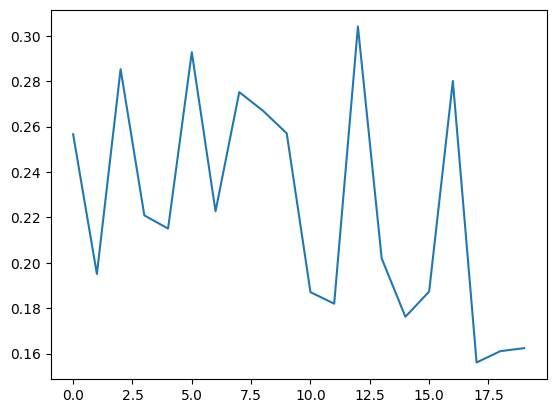

In [ ]:
# Visualisasi Loss untuk setiap epoch
plt.plot(history.history['val_loss'])

Penjelasan: <br>
Membuat plot dari nilai loss pada set data validasi (val_loss) untuk setiap epoch selama pelatihan model. Plot ini memberikan informasi tentang bagaimana loss pada data validasi berubah selama proses pelatihan. Jika garis loss menurun, itu menunjukkan bahwa model semakin baik dalam mengeneralisasi pada data yang tidak digunakan selama pelatihan.

In [ ]:
# Mengakses metrics lain
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Output dari kode diatas adalah dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']), yang menunjukkan bahwa selain loss, kita juga memiliki metrik akurasi (accuracy) dan metrik yang sesuai pada set data validasi (val_accuracy).

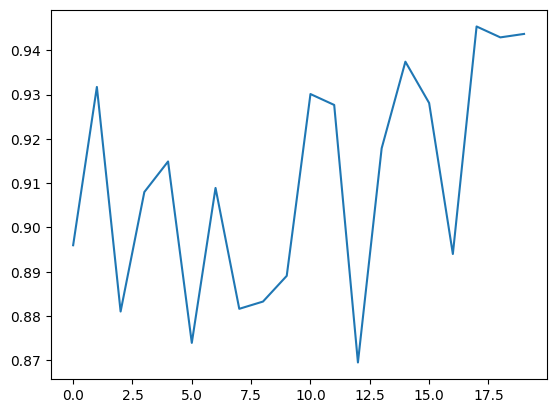

In [ ]:
# visualisasi validation accuracy
plt.plot(history.history['val_accuracy'])

Penjelasan : <br>
Membuat plot dari nilai akurasi pada set data validasi (val_accuracy) untuk setiap epoch selama pelatihan. Plot ini memberikan gambaran tentang sejauh mana model dapat memprediksi dengan benar pada data yang tidak digunakan selama pelatihan.

# Save The Model

In [ ]:
# menyimpan model ke dalam file 'network.h5' di direktori saat ini. save_format='h5' menunjukkan bahwa format penyimpanan yang digunakan adalah 'h5' (HDF5), format umum yang mendukung penyimpanan model TensorFlow.
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [ ]:
# Mengimpor fungsi load_model dari TensorFlow untuk dapat memuat kembali model yang telah disimpan.
from tensorflow.keras.models import load_model

In [ ]:
# Memuat kembali model yang telah disimpan dengan menggunakan load_model.
load_network = load_model('network')

In [ ]:
# Menampilkan ringkasan (summary) dari model yang telah dimuat kembali. Ringkasan ini mencakup informasi tentang jenis layer, ukuran output, dan jumlah parameter yang dapat dipelajari oleh model.
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

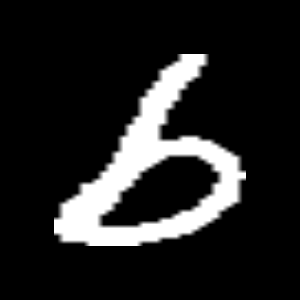

In [ ]:
# Memuat gambar dari path tertentu dan menampilkannya menggunakan cv2_imshow di Colab
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Quiz 2/b_small.png')
cv2_imshow(img)

In [ ]:
# Menampilkan dimensi (shape) gambar. Dalam hal ini, dimensi gambar adalah (300, 300).
img.shape

(300, 300, 3)

In [ ]:
# Mengonversi gambar berwarna (BGR) menjadi citra skala abu-abu (grayscale)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menampilkan dimensi (shape) citra skala abu-abu setelah konversi.
# Citra skala abu-abu hanya memiliki dua dimensi karena tidak ada saluran warna, sehingga hasilnya adalah bentuk (tinggi, lebar) tanpa dimensi warna seperti pada citra berwarna.
gray_img.shape

(300, 300)

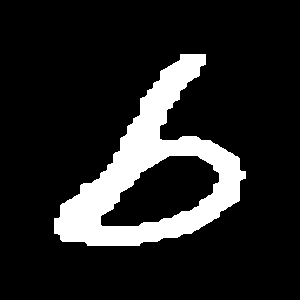

120.0


In [ ]:
# Pre-process
# Pra-pemrosesan gambar dengan menggunakan binary thresholding dan metode Otsu.
# Thresholding menghasilkan gambar biner, dan nilai threshold dicetak.
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [ ]:
# Mengubah ukuran gambar agar sesuai dengan bentuk input model CNN (28*28).
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [ ]:
# Mengonversi gambar ke float32, melakukan normalisasi, dan menambahkan dimensi kedalaman agar sesuai dengan bentuk input model CNN.
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # normalisasi
img_input = np.expand_dims(img_input, axis=-1) # menambahkan dimensi kedalaman

# check shape
img_input.shape

(28, 28, 1)

In [ ]:
# Menambahkan dimensi "jumlah data" agar sesuai dengan bentuk input model CNN.
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [ ]:
# Melakukan prediksi menggunakan model CNN yang telah dimuat sebelumnya dan mencetak label prediksi.
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 160ms/step


6

In [ ]:
# Menampilkan label yang sesuai dengan label prediksi. Dalam hal ini, label 6 sesuai dengan output '6'.
name_labels[6]

'6'

Secara garis besar OCR menggunakan CNN diatas melalui tahapan sebagai berikut:
1. Data Preparation:
  - Menggunakan dataset citra karakter huruf dan angka.
  - Melakukan one-hot encoding pada label untuk mempersiapkan data pelatihan.
2. Data Augmentation untuk menambahkan variasi pada data latih dengan menggunakan ImageDataGenerator untuk meningkatkan kinerja model.
3. Handling Class Imbalance untuk menangani ketidakseimbangan kelas dengan memberikan bobot kepada kelas-kelas yang kurang muncul.
4. Model CNN:
  - Membangun model CNN dengan tiga lapis konvolusi dan lapisan-lapisan Dense untuk klasifikasi karakter.
  - Menggunakan aktivasi 'softmax' pada lapisan output karena merupakan masalah klasifikasi multikelas.
5. Model Checkpoint untuk menyimpan model dengan performa terbaik selama pelatihan.
6. Train Model:
  - Melatih model menggunakan data latih yang telah di-augmentasi dan mengukur performa menggunakan data validasi.
  - Menggunakan strategi random seed untuk mendapatkan hasil yang dapat direproduksi.
7. Melakukan evaluasi pada data uji dan menghasilkan metrik kinerja seperti precision, recall, dan f1-score untuk setiap kelas.
8. Menganalisis hasil pelatihan melalui visualisasi grafik loss dan akurasi pada set pelatihan dan validasi serta performa model pada data uji dan menampilkan classification report.
9. Pengujian pada Gambar Baru:
  - Menguji model pada gambar baru dengan langkah-langkah pra-pemrosesan seperti konversi ke citra skala abu-abu, binerisasi, dan penyesuaian ukuran.
  - Melakukan prediksi pada gambar yang telah di-preprocess.






# **Kesimpulan**
Dari OCR menggunakan CNN diatas, didapatkan kesimpulan sebagai berikut:
- Model CNN yang dibangun mampu mengenali karakter huruf dan angka dengan baik, memberikan akurasi yang tinggi pada data uji.
- Performa model diukur menggunakan metrik seperti precision, recall, dan f1-score, dan hasilnya cukup baik.
- Penggunaan teknik augmentasi data dan penanganan ketidakseimbangan kelas meningkatkan kemampuan generalisasi model.
- Model dapat disimpan dan dimuat ulang untuk penggunaan lebih lanjut, seperti pada pengenalan karakter pada gambar baru. Oleh karena itu, model OCR CNN ini dapat diimplementasikan pada aplikasi pengenalan karakter dalam berbagai konteks, seperti pengenalan plat nomor kendaraan, pengenalan tulisan tangan, dan sebagainya.




